In [1]:
%matplotlib inline

In [2]:
# https://scitools.org.uk/cartopy/docs/latest/gallery/contour_labels.html
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

import csv
import requests
import io

In [3]:
# Load local CSV using request + csv
latlongh_url = "https://raw.githubusercontent.com/swatchai/cartopy_asean_proj/master/lat-long-geoid_h.csv"
r = requests.get(latlongh_url)
buff = io.StringIO(r.text)
#dr = csv.DictReader(buff)
dr = csv.reader(buff)
data_arr = []
for ix,row in enumerate(dr):
    if ix>=1:
        #print(row)
        data_arr.append([float(row[0]),float(row[1]),float(row[2])])
        
latlonh = np.array(data_arr)     

In [4]:
latlonh

array([[  0.  ,  90.  , -64.77],
       [  1.  ,  90.  , -62.52],
       [  2.  ,  90.  , -62.39],
       ...,
       [ 23.  , 115.  ,  -3.67],
       [ 24.  , 115.  ,  -5.52],
       [ 25.  , 115.  ,  -7.03]])

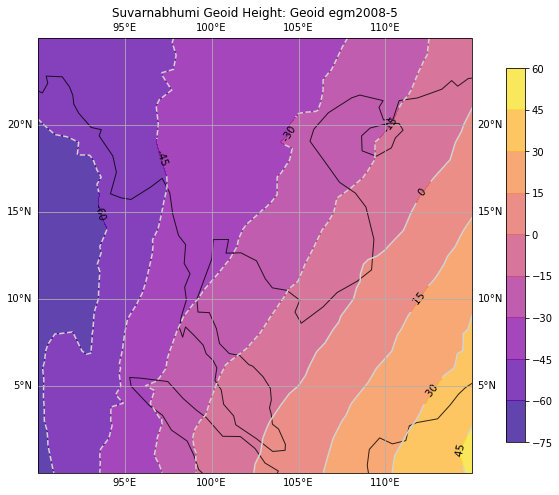

In [9]:
# Create a figure, make a map
# Then plot geoid on a small map

fig = plt.figure(figsize=(12, 8))

projn_lonlat = ccrs.PlateCarree()
ax = fig.add_subplot(1, 1, 1, projection=projn_lonlat)
#ax.set_global()
ax.set_extent( [90, 115, 0, 25], crs=projn_lonlat )

ax.coastlines("110m", alpha=0.8)

# Prep data
lats, lons, zs = latlonh[:,0], latlonh[:,1], latlonh[:,2]

# Add colourful filled contours.
filled_c = ax.tricontourf(lons, lats, zs, transform=ccrs.PlateCarree(), cmap=cm.plasma, alpha=0.75)

# And black line contours.
line_c = ax.tricontour(
    lons, lats, zs, levels=filled_c.levels, colors=["lightgray"], transform=ccrs.PlateCarree()
)

# Uncomment to make the line contours invisible.
plt.setp(line_c.collections, visible=True)

# Add a colorbar for the filled contour.
fig.colorbar(filled_c, orientation="vertical", shrink=0.86)

# Use the line contours to place contour labels.
ax.clabel(
    line_c,  # Typically best results when labelling line contours.
    colors=["black"],
    manual=False,  # Automatic placement vs manual placement.
    inline=True,  # Cut the line where the label will be placed.
    fmt=" {:.0f} ".format,  # Labes as integers, with some extra space.
)

ax.gridlines(crs=projn_lonlat, draw_labels=True, lw=1.2, edgecolor="darkblue", zorder=12)
ax.set_title("Suvarnabhumi Geoid Height: Geoid egm2008-5")
plt.show()